##  Oasis Internship task 5 by Vatsal Zaveri

# Sales Prediction

#### Importing the necessary modules

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Reading the data

In [2]:
sales = pd.read_csv('Advertising.csv',index_col=0)
sales.sample(5)

,TV,Radio,Newspaper,Sales
144,104.6,5.7,34.4,10.4
191,39.5,41.1,5.8,10.8
98,184.9,21.0,22.0,15.5
104,187.9,17.2,17.9,14.7
172,164.5,20.9,47.4,14.5


## Exploratory Data Analysis 

In [3]:
sales.shape

(200, 4)

In [4]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### Performing univariate graphical analysis on various features

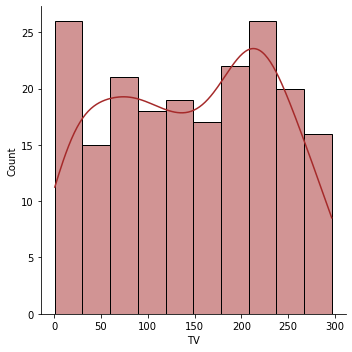

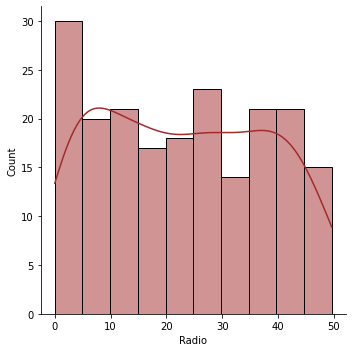

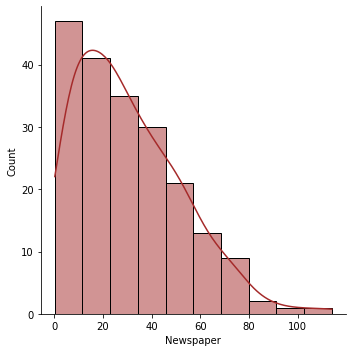

In [5]:
sns.displot(sales.TV,bins=10,color='brown',kde=True)
sns.displot(sales.Radio,bins=10,color='brown',kde=True)
sns.displot(sales.Newspaper,bins=10,color='brown',kde=True)

#### A heatmap to understand the correlation between various features of the car.

<AxesSubplot:>

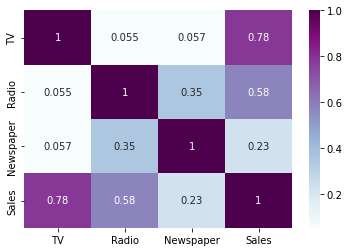

In [6]:
sns.heatmap(sales.corr(),annot=True,cmap="BuPu")

As we can see the 3 variables not correlated with each other

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
r = sales[["TV", "Radio","Newspaper"]].values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(r, i) for i in range(3)]
vif_df["feature"] = ["TV", "Radio","Newspaper"]
vif_df

,VIF,feature
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


### Modelling <br>
1- First model with drop the newspaper feature

In [8]:
X = sales.drop(['Sales','Newspaper'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [9]:
lin_model = ols(formula="Sales ~ TV + Radio ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           4.83e-98
Time:                        13:42:04   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

2- try the model with Newspaper feature added 

In [10]:
X = sales.drop(['Sales'], axis=1)
y = sales[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)


models = [('LinearRegression', LinearRegression())]

In [11]:
lin_model = ols(formula="Sales ~ TV + Radio + Newspaper ",data=sales).fit()

print(lin_model.params,"\n")
print(lin_model.summary())

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        13:42:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------